In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline
#%matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100pd.set_option('display.max_columns', 500)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 150
pd.options.display.max_columns = 100

In [2]:
df0 = pd.read_csv('autoscoutpart_3_dummy.csv')

In [3]:
df = df0.copy()

In [4]:
df.columns

Index(['price', 'km', 'nr._of_doors', 'nr._of_seats', 'cylinders',
       'co2_emission', 'emission_label', 'gears', 'age', 'hp_kw',
       ...
       'upholstery_color_beige', 'upholstery_color_black',
       'upholstery_color_blue', 'upholstery_color_brown',
       'upholstery_color_grey', 'upholstery_color_orange',
       'upholstery_color_other', 'upholstery_color_red',
       'upholstery_color_white', 'upholstery_color_yellow'],
      dtype='object', length=180)

In [5]:
df.head()

,price,km,nr._of_doors,nr._of_seats,cylinders,co2_emission,emission_label,gears,age,hp_kw,displacement_cc,weight_kg,cons_comb_l/100_km,coco_air_conditioning,coco_air_suspension,coco_armrest,coco_automatic_climate_control,coco_auxiliary_heating,coco_cruise_control,coco_electric_starter,coco_electric_tailgate,coco_electrical_side_mirrors,coco_electrically_adjustable_seats,coco_electrically_heated_windshield,coco_heads-up_display,coco_heated_steering_wheel,coco_hill_holder,coco_keyless_central_door_lock,coco_leather_seats,coco_leather_steering_wheel,coco_light_sensor,coco_lumbar_support,coco_massage_seats,coco_multi-function_steering_wheel,coco_navigation_system,coco_panorama_roof,coco_park_distance_control,coco_parking_assist_system_camera,coco_parking_assist_system_self-steering,coco_parking_assist_system_sensors_front,coco_parking_assist_system_sensors_rear,coco_power_windows,coco_rain_sensor,coco_seat_heating,coco_seat_ventilation,coco_split_rear_seats,coco_start-stop_system,coco_sunroof,coco_tinted_windows,coco_wind_deflector,...,body_color_black,body_color_blue,body_color_bronze,body_color_brown,body_color_gold,body_color_gray,body_color_green,body_color_grey,body_color_orange,body_color_red,body_color_silver,body_color_violet,body_color_white,body_color_yellow,paint_type_metallic,paint_type_perl_effect,paint_type_uni/basic,gearing_type_automatic,gearing_type_manual,gearing_type_semi-automatic,drive_chain_4wd,drive_chain_front,fuel_benzin,fuel_diesel,fuel_hybrid,fuel_lpg,fuel_others,emission_class_euro_4,emission_class_euro_5,emission_class_euro_6,vehicle_condition_new,vehicle_condition_used,warranty_month_no_warranty,warranty_month_yes_warranty,upholstery_type_cloth,upholstery_type_full_leather,upholstery_type_other,upholstery_type_part_leather,upholstery_type_velour,upholstery_type_alcantara,upholstery_color_beige,upholstery_color_black,upholstery_color_blue,upholstery_color_brown,upholstery_color_grey,upholstery_color_orange,upholstery_color_other,upholstery_color_red,upholstery_color_white,upholstery_color_yellow
0,15770.000,56013.000,5.000,5.000,3.000,99.000,4.000,7.000,3.000,66.000,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,14500.000,80000.000,3.000,4.000,4.000,129.000,4.000,7.000,2.000,141.000,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,14640.000,83450.000,4.000,4.000,4.000,99.000,4.000,7.000,3.000,85.000,1598.000,1275.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,14500.000,73000.000,3.000,4.000,3.000,99.000,4.000,6.000,3.000,66.000,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,16790.000,16200.000,5.000,5.000,3.000,109.000,4.000,7.000,3.000,66.000,1422.000,1195.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [6]:
df_num = df0.iloc[:,:13]
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15919.000,18022.623,7381.798,4950.000,12850.000,16900.000,21900.000,74600.000
km,15919.000,32082.632,36975.502,0.000,1906.500,20407.000,46898.500,317000.000
nr._of_doors,15919.000,4.660,0.642,2.000,4.000,5.000,5.000,5.000
nr._of_seats,15919.000,4.947,0.486,2.000,5.000,5.000,5.000,7.000
cylinders,15919.000,3.786,0.414,3.000,4.000,4.000,4.000,5.000
co2_emission,15919.000,118.082,16.952,91.000,105.000,117.000,128.000,189.000
emission_label,15919.000,3.928,0.460,1.000,4.000,4.000,4.000,5.000
gears,15919.000,5.948,0.731,5.000,5.000,6.000,6.000,9.000
age,15919.000,1.389,1.121,0.000,0.000,1.000,2.000,3.000
hp_kw,15919.000,88.512,26.713,40.000,66.000,85.000,103.000,294.000


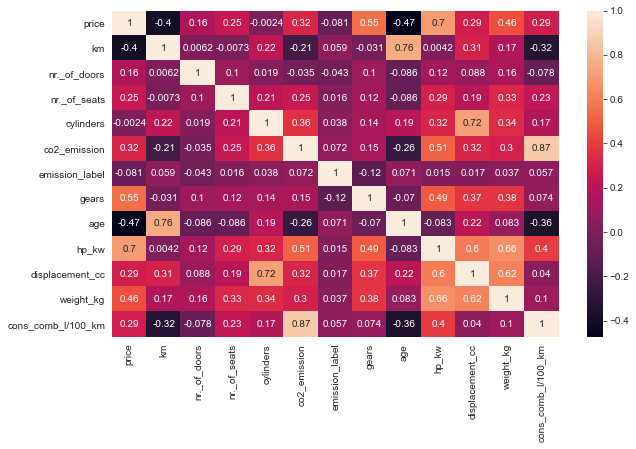

In [7]:
sns.heatmap(df_num.corr(), annot = True);

In [8]:
def check_dist(df_num, var):
    plt.subplot(1, 2, 1)
    sns.histplot(x=var, data=df)
    plt.subplot(1, 2, 2)
    stats.probplot(df_num[var], dist="norm", plot=plt)
    plt.show()

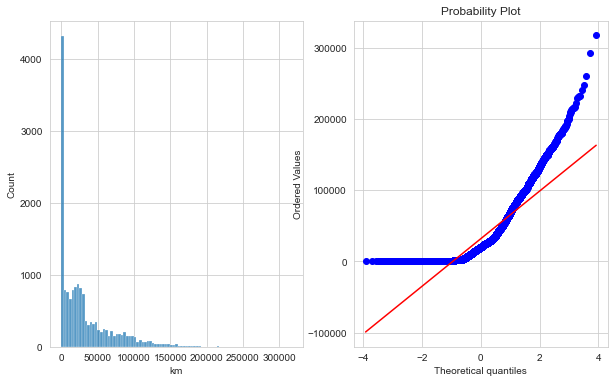

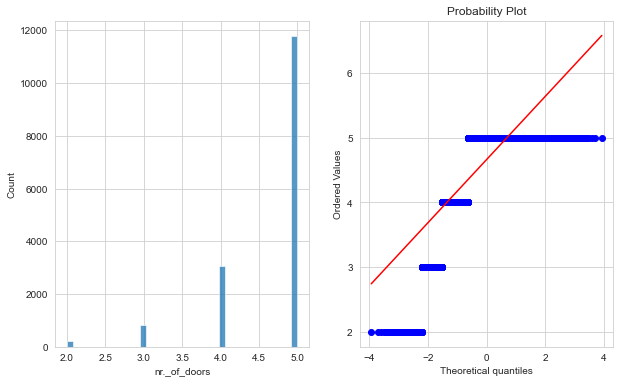

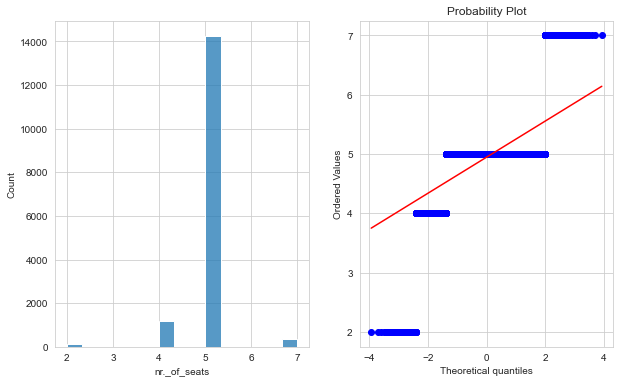

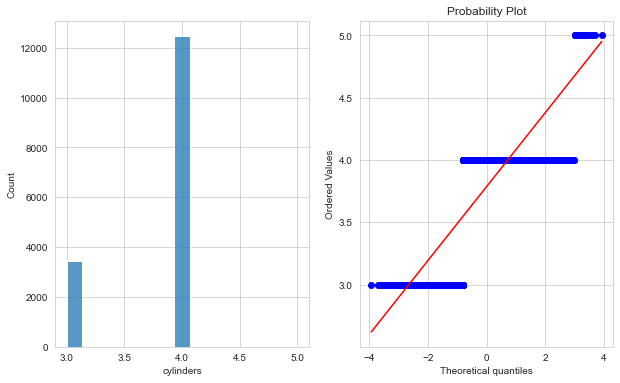

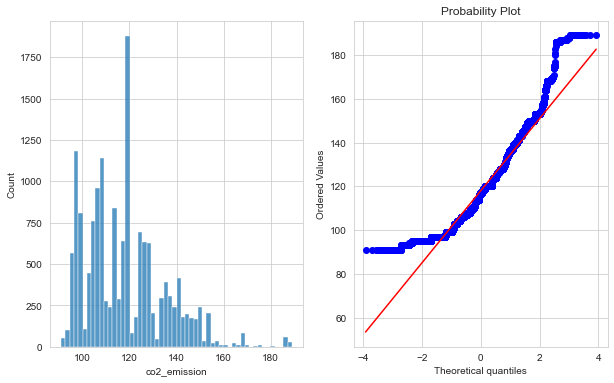

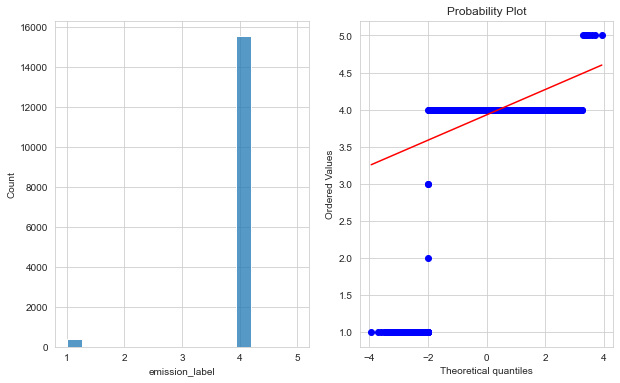

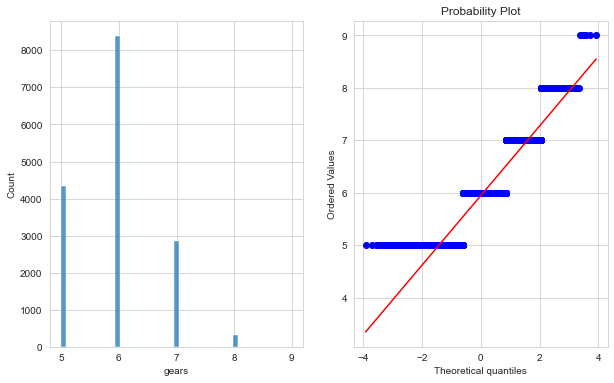

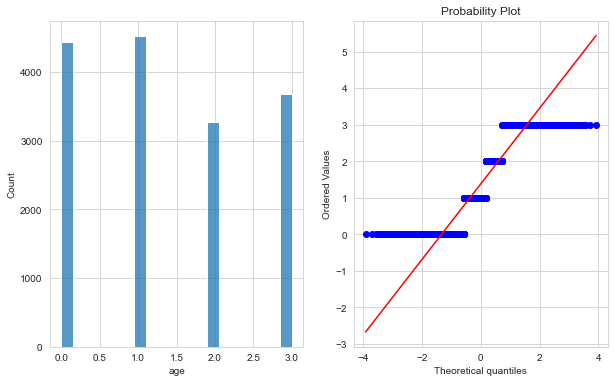

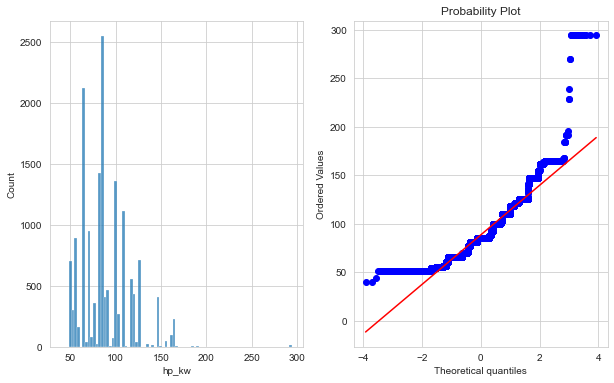

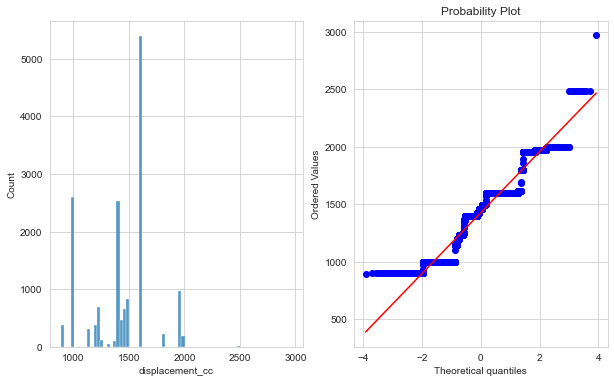

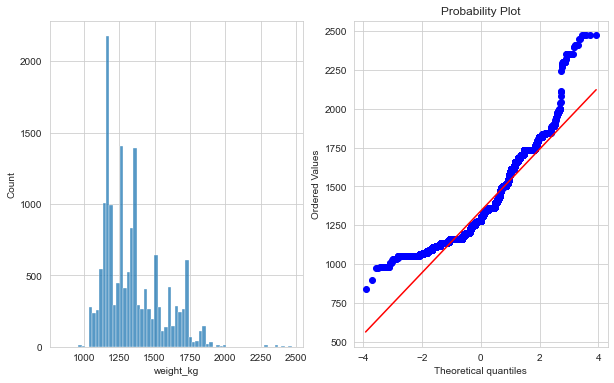

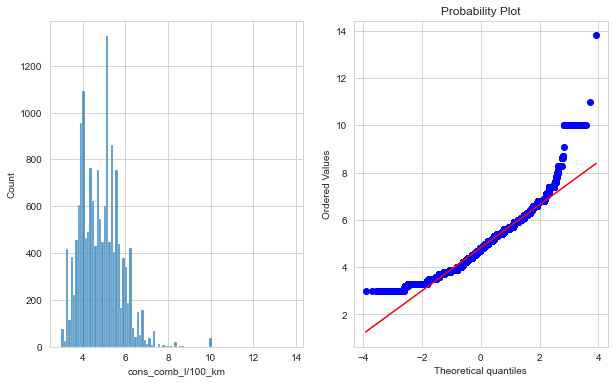

In [9]:
for col in df_num.drop("price", axis =1).columns:
    check_dist(df_num, col)

In [147]:
X = df.drop(columns = 'price')
y = df['price']

# Train | Test Split

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [150]:
df.sample(15)

,price,km,nr._of_doors,nr._of_seats,cylinders,co2_emission,emission_label,gears,age,hp_kw,displacement_cc,weight_kg,cons_comb_l/100_km,coco_air_conditioning,coco_air_suspension,coco_armrest,coco_automatic_climate_control,coco_auxiliary_heating,coco_cruise_control,coco_electric_starter,coco_electric_tailgate,coco_electrical_side_mirrors,coco_electrically_adjustable_seats,coco_electrically_heated_windshield,coco_heads-up_display,coco_heated_steering_wheel,coco_hill_holder,coco_keyless_central_door_lock,coco_leather_seats,coco_leather_steering_wheel,coco_light_sensor,coco_lumbar_support,coco_massage_seats,coco_multi-function_steering_wheel,coco_navigation_system,coco_panorama_roof,coco_park_distance_control,coco_parking_assist_system_camera,coco_parking_assist_system_self-steering,coco_parking_assist_system_sensors_front,coco_parking_assist_system_sensors_rear,coco_power_windows,coco_rain_sensor,coco_seat_heating,coco_seat_ventilation,coco_split_rear_seats,coco_start-stop_system,coco_sunroof,coco_tinted_windows,coco_wind_deflector,...,body_color_black,body_color_blue,body_color_bronze,body_color_brown,body_color_gold,body_color_gray,body_color_green,body_color_grey,body_color_orange,body_color_red,body_color_silver,body_color_violet,body_color_white,body_color_yellow,paint_type_metallic,paint_type_perl_effect,paint_type_uni/basic,gearing_type_automatic,gearing_type_manual,gearing_type_semi-automatic,drive_chain_4wd,drive_chain_front,fuel_benzin,fuel_diesel,fuel_hybrid,fuel_lpg,fuel_others,emission_class_euro_4,emission_class_euro_5,emission_class_euro_6,vehicle_condition_new,vehicle_condition_used,warranty_month_no_warranty,warranty_month_yes_warranty,upholstery_type_cloth,upholstery_type_full_leather,upholstery_type_other,upholstery_type_part_leather,upholstery_type_velour,upholstery_type_alcantara,upholstery_color_beige,upholstery_color_black,upholstery_color_blue,upholstery_color_brown,upholstery_color_grey,upholstery_color_orange,upholstery_color_other,upholstery_color_red,upholstery_color_white,upholstery_color_yellow
12100,20950.000,9206.000,5.000,5.000,4.000,136.000,4.000,6.000,1.000,103.000,1490.000,1487.000,5.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
8529,11980.000,17653.000,5.000,5.000,4.000,120.000,4.000,5.000,3.000,66.000,1398.000,1163.000,4.800,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
12907,25980.000,1652.839,4.000,5.000,4.000,136.000,4.000,6.000,0.000,125.000,1490.000,1456.000,5.200,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7274,15450.000,9500.000,5.000,5.000,3.000,107.000,4.000,5.000,1.000,66.000,999.000,1263.000,4.700,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
11882,22990.000,27450.000,5.000,5.000,4.000,138.000,4.000,6.000,1.000,121.000,1490.000,1472.000,6.100,1,0,1,0,0,1,0,0,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2522,22490.000,10.000,4.000,5.000,3.000,108.000,4.000,5.000,0.000,70.000,999.000,1135.000,4.400,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1378,14999.000,16644.000,5.000,4.000,3.000,97.000,4.000,5.000,2.000,66.000,1422.000,1195.000,3.700,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8

In [151]:
print("Train features shape :", X_train.shape)
print("Train features shape :", y_train.shape)
print("Test features shape :", X_test.shape)
print("Test features shape :", y_test.shape)

Train features shape : (11143, 179)
Train features shape : (11143,)
Test features shape : (4776, 179)
Test features shape : (4776,)


In [152]:
X_train

,km,nr._of_doors,nr._of_seats,cylinders,co2_emission,emission_label,gears,age,hp_kw,displacement_cc,weight_kg,cons_comb_l/100_km,coco_air_conditioning,coco_air_suspension,coco_armrest,coco_automatic_climate_control,coco_auxiliary_heating,coco_cruise_control,coco_electric_starter,coco_electric_tailgate,coco_electrical_side_mirrors,coco_electrically_adjustable_seats,coco_electrically_heated_windshield,coco_heads-up_display,coco_heated_steering_wheel,coco_hill_holder,coco_keyless_central_door_lock,coco_leather_seats,coco_leather_steering_wheel,coco_light_sensor,coco_lumbar_support,coco_massage_seats,coco_multi-function_steering_wheel,coco_navigation_system,coco_panorama_roof,coco_park_distance_control,coco_parking_assist_system_camera,coco_parking_assist_system_self-steering,coco_parking_assist_system_sensors_front,coco_parking_assist_system_sensors_rear,coco_power_windows,coco_rain_sensor,coco_seat_heating,coco_seat_ventilation,coco_split_rear_seats,coco_start-stop_system,coco_sunroof,coco_tinted_windows,coco_wind_deflector,coco_windshield,...,body_color_black,body_color_blue,body_color_bronze,body_color_brown,body_color_gold,body_color_gray,body_color_green,body_color_grey,body_color_orange,body_color_red,body_color_silver,body_color_violet,body_color_white,body_color_yellow,paint_type_metallic,paint_type_perl_effect,paint_type_uni/basic,gearing_type_automatic,gearing_type_manual,gearing_type_semi-automatic,drive_chain_4wd,drive_chain_front,fuel_benzin,fuel_diesel,fuel_hybrid,fuel_lpg,fuel_others,emission_class_euro_4,emission_class_euro_5,emission_class_euro_6,vehicle_condition_new,vehicle_condition_used,warranty_month_no_warranty,warranty_month_yes_warranty,upholstery_type_cloth,upholstery_type_full_leather,upholstery_type_other,upholstery_type_part_leather,upholstery_type_velour,upholstery_type_alcantara,upholstery_color_beige,upholstery_color_black,upholstery_color_blue,upholstery_color_brown,upholstery_color_grey,upholstery_color_orange,upholstery_color_other,upholstery_color_red,upholstery_color_white,upholstery_color_yellow
10814,159000.000,5.000,5.000,4.000,169.000,4.000,8.000,3.000,125.000,1956.000,1613.000,6.400,1,1,1,1,0,1,0,1,1,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1,0,0,1,1,1,1,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4870,21511.000,5.000,5.000,4.000,106.000,4.000,6.000,1.000,85.000,1598.000,1360.000,4.000,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
6428,100311.000,5.000,5.000,4.000,97.000,4.000,6.000,3.000,81.000,1598.000,1360.000,3.700,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
15325,26200.000,5.000,5.000,4.000,116.000,4.000,6.000,2.000,96.000,1598.000,1540.000,4.000,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
11461,84102.000,5.000,5.000,4.000,145.000,4.000,6.000,2.000,125.000,1956.000,1838.000,5.700,1,0,1,1,1,1,0,1,1,1,0,0,1,0,0,0,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13418,78851.000,5.000,5.000,4.000,109.000,4.000,6.000,3.000,66.000,1461.000,1119.000,3.500,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...

In [153]:
y_train

10814   12750.000
4870    20700.000
6428    10950.000
15325   23900.000
11461   18980.000
           ...   
13418   10500.000
5390    24980.000
860     20500.000
15795   34200.000
7270    15450.000
Name: price, Length: 11143, dtype: float64

In [154]:
X_test

,km,nr._of_doors,nr._of_seats,cylinders,co2_emission,emission_label,gears,age,hp_kw,displacement_cc,weight_kg,cons_comb_l/100_km,coco_air_conditioning,coco_air_suspension,coco_armrest,coco_automatic_climate_control,coco_auxiliary_heating,coco_cruise_control,coco_electric_starter,coco_electric_tailgate,coco_electrical_side_mirrors,coco_electrically_adjustable_seats,coco_electrically_heated_windshield,coco_heads-up_display,coco_heated_steering_wheel,coco_hill_holder,coco_keyless_central_door_lock,coco_leather_seats,coco_leather_steering_wheel,coco_light_sensor,coco_lumbar_support,coco_massage_seats,coco_multi-function_steering_wheel,coco_navigation_system,coco_panorama_roof,coco_park_distance_control,coco_parking_assist_system_camera,coco_parking_assist_system_self-steering,coco_parking_assist_system_sensors_front,coco_parking_assist_system_sensors_rear,coco_power_windows,coco_rain_sensor,coco_seat_heating,coco_seat_ventilation,coco_split_rear_seats,coco_start-stop_system,coco_sunroof,coco_tinted_windows,coco_wind_deflector,coco_windshield,...,body_color_black,body_color_blue,body_color_bronze,body_color_brown,body_color_gold,body_color_gray,body_color_green,body_color_grey,body_color_orange,body_color_red,body_color_silver,body_color_violet,body_color_white,body_color_yellow,paint_type_metallic,paint_type_perl_effect,paint_type_uni/basic,gearing_type_automatic,gearing_type_manual,gearing_type_semi-automatic,drive_chain_4wd,drive_chain_front,fuel_benzin,fuel_diesel,fuel_hybrid,fuel_lpg,fuel_others,emission_class_euro_4,emission_class_euro_5,emission_class_euro_6,vehicle_condition_new,vehicle_condition_used,warranty_month_no_warranty,warranty_month_yes_warranty,upholstery_type_cloth,upholstery_type_full_leather,upholstery_type_other,upholstery_type_part_leather,upholstery_type_velour,upholstery_type_alcantara,upholstery_color_beige,upholstery_color_black,upholstery_color_blue,upholstery_color_brown,upholstery_color_grey,upholstery_color_orange,upholstery_color_other,upholstery_color_red,upholstery_color_white,upholstery_color_yellow
6126,77709.000,5.000,5.000,4.000,97.000,4.000,6.000,3.000,81.000,1598.000,1503.000,3.700,1,0,1,1,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7091,28612.000,5.000,5.000,4.000,125.000,4.000,6.000,1.000,110.000,1399.000,1350.000,5.400,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1659,13417.000,5.000,5.000,3.000,108.000,4.000,7.000,1.000,71.000,999.000,1135.000,4.400,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
8753,86897.000,5.000,5.000,4.000,120.000,4.000,5.000,3.000,66.000,1398.000,1163.000,5.000,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,0,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
9679,4398.000,3.000,5.000,4.000,135.000,4.000,6.000,1.000,66.000,1398.000,1163.000,5.900,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10519,47600.000,5.000,5.000,4.000,143.000,4.000,6.000,3.000,125.000,1956.000,1674.000,5.400,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,

In [155]:
y_test

6126    10480.000
7091    18780.000
1659    21900.000
8753     6940.000
9679    14598.000
           ...   
10519   17980.000
3409    20000.000
6205    10000.000
1718    16669.000
14419   18490.000
Name: price, Length: 4776, dtype: float64

## Scaling the Data

In [20]:
#from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#scaler = StandardScaler()

In [21]:
#scaler.fit(X_train)

In [22]:
#X_train = scaler.transform(X_train)

In [23]:
#X_train

In [24]:
#X_test = scaler.transform(X_test)

In [25]:
#X_test

In [26]:
#pd.DataFrame(X_train).agg(["mean", "std"]).round()

In [27]:
#pd.DataFrame(X_test).agg(["mean", "std"]).round()

# Linear Regression (Before Scaling)

In [156]:
from sklearn.linear_model import LinearRegression

In [157]:
lm = LinearRegression()

In [158]:
lm.fit(X_train, y_train)

LinearRegression()

In [159]:
y_pred = lm.predict(X_test)

In [160]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [161]:
y_train_pred = lm.predict(X_train)

In [162]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8900245569435136
MAE 		: 1706.1890878068955
MSE 		: 6008943.408938097
RMSE 		: 2451.3146287121317


In [163]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8805046473444177
MAE 		: 1760.6678010922572
MSE 		: 6468755.35970305
RMSE 		: 2543.3747973318937


In [164]:
lm_scores = {"lm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ls =pd.DataFrame(lm_scores)
ls

,lm_train,lm_test
rmse,2451.315,2543.375
mae,1706.189,1760.668
mse,6008943.409,6468755.360
R2,0.890,0.881


## Cross Validate

In [165]:
from sklearn.model_selection import cross_validate, cross_val_score

In [166]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [167]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.154,0.007,0.892,-1758.175,-6019364.138,-2453.439
2,0.133,0.007,0.887,-1716.313,-6582719.062,-2565.681
3,0.118,0.011,0.892,-1697.539,-5762337.453,-2400.487
4,0.132,0.010,0.868,-1755.232,-6577858.858,-2564.734
5,0.104,0.007,0.877,-1796.233,-6402442.292,-2530.305
6,0.117,0.009,0.894,-1646.846,-5109487.164,-2260.417
7,0.122,0.006,0.875,-1818.432,-7665207.106,-2768.611
8,0.097,0.006,0.884,-1834.358,-7195896.719,-2682.517
9,0.139,0.010,0.884,-1717.999,-6537556.020,-2556.864
10,0.129,0.009,0.881,-1681.471,-5785595.595,-2405.327


In [168]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                   0.883
test_neg_mean_absolute_error          -1742.260
test_neg_mean_squared_error        -6363846.441
test_neg_root_mean_squared_error      -2518.838
dtype: float64

In [169]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8805046473444177
MAE 		: 1760.6678010922572
MSE 		: 6468755.35970305
RMSE 		: 2543.3747973318937


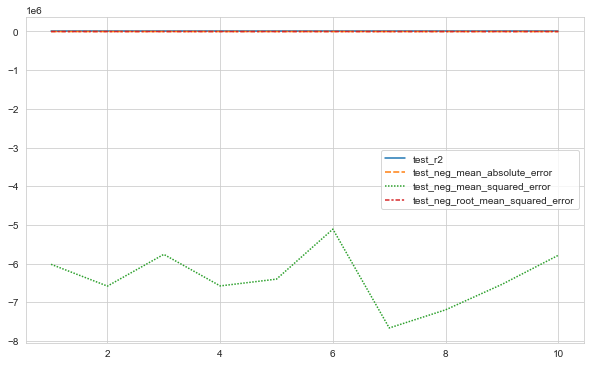

In [170]:
sns.lineplot(data = scores.iloc[:,2:]);

In [171]:
lm.coef_

array([-3.85617637e-02,  4.24838096e+02, -3.04385260e+01,  1.66773336e+02,
        7.95111791e+00, -1.47242809e+02,  5.20513834e+02, -1.74805734e+03,
        9.17404186e+01, -8.58347274e-01, -2.45895764e+00, -1.70226324e+02,
        4.13293019e+02, -5.53125342e+02, -2.72424951e+01,  2.48848350e+02,
       -4.08909646e+02,  2.73022426e+02, -1.03144506e+03, -4.66730360e+01,
       -1.60639070e+01,  1.48787481e+02,  5.61997667e+01,  2.42336768e+03,
        3.32984935e+02,  1.00525598e+02,  2.06071368e+02, -8.21451372e+02,
        1.33850978e+02,  8.58972521e+01, -3.57167025e+02,  4.80742959e+02,
        9.74412612e+01,  2.07364876e+02, -4.78337244e+02,  5.28934648e+02,
        7.46369337e+00,  9.44423417e+02,  1.47183590e+02, -3.76314002e+02,
        1.31835374e+02, -2.22459123e+02,  9.49947344e+01,  5.01145077e+02,
       -2.11813557e+02,  1.58656279e+02,  6.27234365e+02,  1.84446925e+01,
       -4.00089633e+02, -2.13855392e+02, -4.53349179e+02,  1.16478272e+02,
        8.48627506e+02, -

In [172]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,-0.039
1,424.838
2,-30.439
3,166.773
4,7.951
...,...
174,0.000
175,56.301
176,1393.327
177,1096.739


# Ridge Regresyon

In [106]:
from sklearn.linear_model import Ridge

In [107]:
ridge_model = Ridge(alpha=1)

In [108]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [109]:
y_pred = ridge_model.predict(X_test)
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8807724818220328
MAE 		: 1760.1352904852495
MSE 		: 6454256.4216767335
RMSE 		: 2540.522863836642


In [110]:
y_train_pred = ridge_model.predict(X_train)
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.889952339225672
MAE 		: 1706.7088847650982
MSE 		: 6012889.309655312
RMSE 		: 2452.119350613936


In [111]:
ridge_scores = {"ridge_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rs = pd.DataFrame(ridge_scores)
rs

,ridge_train,ridge_test
rmse,2452.119,2540.523
mae,1706.709,1760.135
mse,6012889.310,6454256.422
R2,0.890,0.881


In [112]:
pd.concat([ls, rs], axis=1)

,lm_train,lm_test,ridge_train,ridge_test
rmse,2451.315,2543.375,2452.119,2540.523
mae,1706.189,1760.668,1706.709,1760.135
mse,6008943.409,6468755.360,6012889.310,6454256.422
R2,0.890,0.881,0.890,0.881


## For Ridge Regression CV with alpha : 1

In [173]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [174]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.892,-1757.416,-6005265.487,-2450.564
2,0.887,-1716.780,-6583793.975,-2565.890
3,0.892,-1697.439,-5760129.033,-2400.027
4,0.869,-1753.910,-6535008.897,-2556.366
5,0.877,-1794.677,-6393450.499,-2528.527
6,0.895,-1646.695,-5089935.463,-2256.089
7,0.875,-1820.513,-7677244.255,-2770.784
8,0.884,-1833.331,-7178252.887,-2679.226
9,0.891,-1702.433,-6175489.868,-2485.053
10,0.881,-1681.029,-5781305.225,-2404.434


<AxesSubplot:>

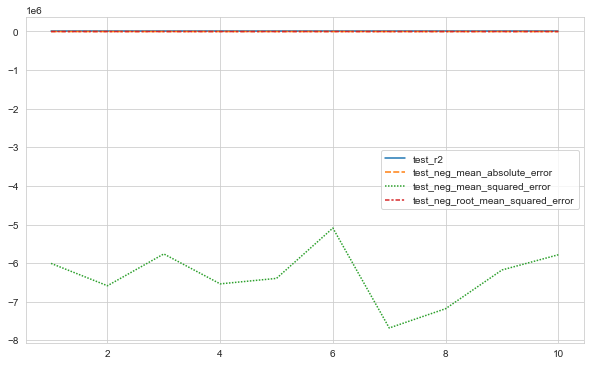

In [175]:
sns.lineplot(data = scores.iloc[:,2:])

In [176]:
pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:].mean()

test_r2                                   0.884
test_neg_mean_absolute_error          -1740.422
test_neg_mean_squared_error        -6317987.559
test_neg_root_mean_squared_error      -2509.696
dtype: float64

In [177]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8805046473444177
MAE 		: 1760.6678010922572
MSE 		: 6468755.35970305
RMSE 		: 2543.3747973318937


In [178]:
ridge_model.coef_

array([-3.85549676e-02,  4.23397675e+02, -2.86590836e+01,  1.66988524e+02,
        8.32359026e+00, -1.45882855e+02,  5.22443910e+02, -1.74785249e+03,
        9.24385605e+01, -9.00220708e-01, -2.39094163e+00, -1.87754913e+02,
        4.05998575e+02, -5.19436553e+02, -2.40378088e+01,  2.47665325e+02,
       -4.06977720e+02,  2.74951150e+02, -5.26310960e+02, -3.95646926e+01,
       -1.54810522e+01,  1.50190313e+02,  6.45229118e+01,  2.41467082e+03,
        3.25723752e+02,  1.01274436e+02,  2.05617664e+02, -7.94987357e+02,
        1.35917541e+02,  8.35970724e+01, -3.57761441e+02,  4.73536458e+02,
        9.24622710e+01,  2.08166786e+02, -4.65956543e+02,  5.32280359e+02,
        3.68760297e+00,  9.50087811e+02,  1.47836768e+02, -3.79733838e+02,
        1.35359343e+02, -2.20709130e+02,  1.00293006e+02,  4.97527217e+02,
       -2.06303118e+02,  1.55693000e+02,  6.35429472e+02,  1.75382289e+01,
       -3.86911919e+02, -1.92191151e+02, -4.54347028e+02,  1.12581396e+02,
        8.49457863e+02, -

In [179]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [180]:
pd.concat([lm_df,rm_df], axis = 1)

,lm_coef,ridge_coef_1
0,-0.039,-0.039
1,424.838,423.398
2,-30.439,-28.659
3,166.773,166.989
4,7.951,8.324
...,...,...
174,0.000,0.000
175,56.301,46.837
176,1393.327,1180.702
177,1096.739,966.643


## Choosing best alpha value with Cross-Validation

In [181]:
from sklearn.linear_model import RidgeCV

In [182]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [183]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")

In [184]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [185]:
ridge_cv_model.alpha_

1.0

In [186]:
y_pred = ridge_cv_model.predict(X_test)

In [187]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8807724818220328
MAE 		: 1760.1352904852495
MSE 		: 6454256.4216767335
RMSE 		: 2540.522863836642


In [188]:
y_train_pred = ridge_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred) 

Model testing performance:
--------------------------
R2_score 	: 0.889952339225672
MAE 		: 1706.7088847650982
MSE 		: 6012889.309655312
RMSE 		: 2452.119350613936


In [189]:
ridge_cv_scores = {"ridge_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

,ridge_cv_train,ridge_cv_test
rmse,2452.119,2540.523
mae,1706.709,1760.135
mse,6012889.310,6454256.422
R2,0.890,0.881


In [190]:
pd.concat([ls, rs, rcs], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
rmse,2451.315,2543.375,2452.119,2540.523,2452.119,2540.523
mae,1706.189,1760.668,1706.709,1760.135,1706.709,1760.135
mse,6008943.409,6468755.360,6012889.310,6454256.422,6012889.310,6454256.422
R2,0.890,0.881,0.890,0.881,0.890,0.881


In [191]:
ridge_cv_model.coef_

array([-3.85549676e-02,  4.23397675e+02, -2.86590836e+01,  1.66988524e+02,
        8.32359026e+00, -1.45882855e+02,  5.22443910e+02, -1.74785249e+03,
        9.24385605e+01, -9.00220708e-01, -2.39094163e+00, -1.87754913e+02,
        4.05998575e+02, -5.19436553e+02, -2.40378088e+01,  2.47665325e+02,
       -4.06977720e+02,  2.74951150e+02, -5.26310960e+02, -3.95646926e+01,
       -1.54810522e+01,  1.50190313e+02,  6.45229118e+01,  2.41467082e+03,
        3.25723752e+02,  1.01274436e+02,  2.05617664e+02, -7.94987357e+02,
        1.35917541e+02,  8.35970724e+01, -3.57761441e+02,  4.73536458e+02,
        9.24622710e+01,  2.08166786e+02, -4.65956543e+02,  5.32280359e+02,
        3.68760297e+00,  9.50087811e+02,  1.47836768e+02, -3.79733838e+02,
        1.35359343e+02, -2.20709130e+02,  1.00293006e+02,  4.97527217e+02,
       -2.06303118e+02,  1.55693000e+02,  6.35429472e+02,  1.75382289e+01,
       -3.86911919e+02, -1.92191151e+02, -4.54347028e+02,  1.12581396e+02,
        8.49457863e+02, -

In [192]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["Ridge_cv_coef_0.02"])

In [193]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.02
0,-0.039,-0.039,-0.039
1,424.838,423.398,423.398
2,-30.439,-28.659,-28.659
3,166.773,166.989,166.989
4,7.951,8.324,8.324
...,...,...,...
174,0.000,0.000,0.000
175,56.301,46.837,46.837
176,1393.327,1180.702,1180.702
177,1096.739,966.643,966.643


# Lasso

In [194]:
from sklearn.linear_model import Lasso, LassoCV

In [195]:
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [196]:
y_train_pred = lasso_model.predict(X_train)

In [197]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8894596867402673
MAE 		: 1707.86856249719
MSE 		: 6039807.327194452
RMSE 		: 2457.6019464499236


In [198]:
y_pred = lasso_model.predict(X_test)

In [199]:
lasso_scores = {"lasso_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lss = pd.DataFrame(lasso_scores)
lss

,lasso_train,lasso_test
rmse,2457.602,2537.134
mae,1707.869,1757.263
mse,6039807.327,6437047.206
R2,0.889,0.881


In [200]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
rmse,2451.315,2543.375,2452.119,2540.523,2452.119,2540.523,2457.602,2537.134
mae,1706.189,1760.668,1706.709,1760.135,1706.709,1760.135,1707.869,1757.263
mse,6008943.409,6468755.360,6012889.310,6454256.422,6012889.310,6454256.422,6039807.327,6437047.206
R2,0.890,0.881,0.890,0.881,0.890,0.881,0.889,0.881


## For Lasso CV with Default Alpha : 1

In [201]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [202]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.892,-1755.783,-5992797.707,-2448.019
2,0.887,-1712.912,-6575461.539,-2564.266
3,0.892,-1694.793,-5764260.500,-2400.887
4,0.870,-1747.405,-6465691.809,-2542.772
5,0.877,-1791.878,-6391346.838,-2528.111
6,0.896,-1639.849,-5016943.960,-2239.854
7,0.875,-1825.673,-7663748.765,-2768.348
8,0.885,-1828.742,-7171259.606,-2677.921
9,0.892,-1692.812,-6122300.586,-2474.328
10,0.882,-1676.781,-5760462.455,-2400.096


<AxesSubplot:>

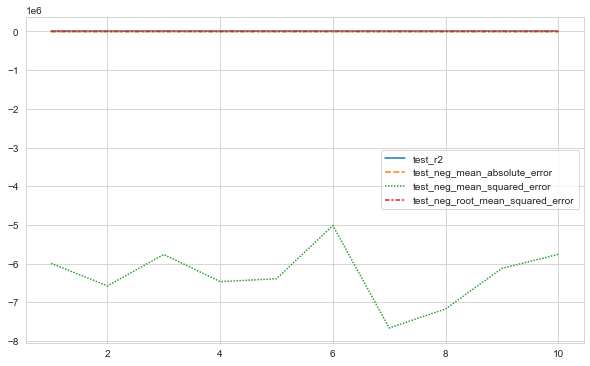

In [203]:
sns.lineplot(data = scores.iloc[:,2:])

In [204]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                   0.885
test_neg_mean_absolute_error          -1736.663
test_neg_mean_squared_error        -6292427.377
test_neg_root_mean_squared_error      -2504.460
dtype: float64

In [205]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8810903824360651
MAE 		: 1757.263171792395
MSE 		: 6437047.205961028
RMSE 		: 2537.1336594592385


In [206]:
lasso_model.coef_

array([-3.86409185e-02,  4.09764350e+02, -2.45672003e+01,  1.18125375e+02,
        8.11002834e+00, -1.30861677e+02,  5.31401380e+02, -1.75169273e+03,
        9.36987042e+01, -8.68228706e-01, -2.31614245e+00, -1.93624199e+02,
        3.69205494e+02, -2.46783731e+02, -4.03276103e+00,  2.46289155e+02,
       -3.40637462e+02,  2.66525640e+02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  1.41400791e+02,  4.55415299e+01,  2.40196508e+03,
        3.30520005e+02,  9.49038705e+01,  1.89763256e+02, -4.96075823e+02,
        1.36645814e+02,  6.69510014e+01, -3.60980278e+02,  3.41945152e+02,
        8.75396432e+01,  2.12591381e+02, -3.95644115e+02,  5.18413305e+02,
       -0.00000000e+00,  9.50254229e+02,  1.33546254e+02, -3.53224495e+02,
        1.13230640e+02, -2.07801523e+02,  8.71134163e+01,  4.91795747e+02,
       -1.79580698e+02,  1.42030476e+02,  5.98042881e+02,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -4.55960320e+02,  1.02824457e+02,
        8.45619152e+02, -

In [207]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [208]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.02,lasso_coef_1
0,-0.039,-0.039,-0.039,-0.039
1,424.838,423.398,423.398,409.764
2,-30.439,-28.659,-28.659,-24.567
3,166.773,166.989,166.989,118.125
4,7.951,8.324,8.324,8.110
...,...,...,...,...
174,0.000,0.000,0.000,0.000
175,56.301,46.837,46.837,73.889
176,1393.327,1180.702,1180.702,0.000
177,1096.739,966.643,966.643,0.000


## Choosing best alpha value with Cross-Validation

In [209]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter = 100000)

In [210]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, max_iter=100000)

In [211]:
lasso_cv_model.alpha_

1.0

In [212]:
y_train_pred = lasso_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8894596867402673
MAE 		: 1707.86856249719
MSE 		: 6039807.327194452
RMSE 		: 2457.6019464499236


In [213]:
y_pred = lasso_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8810903824360651
MAE 		: 1757.263171792395
MSE 		: 6437047.205961028
RMSE 		: 2537.1336594592385


In [214]:
lasso_cv_scores = {"lasso_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lcs = pd.DataFrame(lasso_cv_scores)
lcs

,lasso_cv_train,lasso_cv_test
rmse,2457.602,2537.134
mae,1707.869,1757.263
mse,6039807.327,6437047.206
R2,0.889,0.881


In [215]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
rmse,2451.315,2543.375,2452.119,2540.523,2452.119,2540.523,2457.602,2537.134,2457.602,2537.134
mae,1706.189,1760.668,1706.709,1760.135,1706.709,1760.135,1707.869,1757.263,1707.869,1757.263
mse,6008943.409,6468755.360,6012889.310,6454256.422,6012889.310,6454256.422,6039807.327,6437047.206,6039807.327,6437047.206
R2,0.890,0.881,0.890,0.881,0.890,0.881,0.889,0.881,0.889,0.881


In [216]:
lasso_cv_model.coef_

array([-3.86409185e-02,  4.09764350e+02, -2.45672003e+01,  1.18125375e+02,
        8.11002834e+00, -1.30861677e+02,  5.31401380e+02, -1.75169273e+03,
        9.36987042e+01, -8.68228706e-01, -2.31614245e+00, -1.93624199e+02,
        3.69205494e+02, -2.46783731e+02, -4.03276103e+00,  2.46289155e+02,
       -3.40637462e+02,  2.66525640e+02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  1.41400791e+02,  4.55415299e+01,  2.40196508e+03,
        3.30520005e+02,  9.49038705e+01,  1.89763256e+02, -4.96075823e+02,
        1.36645814e+02,  6.69510014e+01, -3.60980278e+02,  3.41945152e+02,
        8.75396432e+01,  2.12591381e+02, -3.95644115e+02,  5.18413305e+02,
       -0.00000000e+00,  9.50254229e+02,  1.33546254e+02, -3.53224495e+02,
        1.13230640e+02, -2.07801523e+02,  8.71134163e+01,  4.91795747e+02,
       -1.79580698e+02,  1.42030476e+02,  5.98042881e+02,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -4.55960320e+02,  1.02824457e+02,
        8.45619152e+02, -

In [217]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [218]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01
0,-0.039,-0.039,-0.039,-0.039,-0.039
1,424.838,423.398,423.398,409.764,409.764
2,-30.439,-28.659,-28.659,-24.567,-24.567
3,166.773,166.989,166.989,118.125,118.125
4,7.951,8.324,8.324,8.110,8.110
...,...,...,...,...,...
174,0.000,0.000,0.000,0.000,0.000
175,56.301,46.837,46.837,73.889,73.889
176,1393.327,1180.702,1180.702,0.000,0.000
177,1096.739,966.643,966.643,0.000,0.000


# Elastic net

In [219]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [220]:
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

ElasticNet()

In [221]:
elastic_model.l1_ratio

0.5

In [225]:
elastic_model.alpha

1.0

In [226]:
y_train_pred = elastic_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.809578834421893
MAE 		: 2317.8941886850566
MSE 		: 10404413.712933779
RMSE 		: 3225.587343869916


In [227]:
y_pred = elastic_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8071788630638749
MAE 		: 2337.609595124089
MSE 		: 10438169.646770153
RMSE 		: 3230.8156318134515


In [228]:
elastic_scores = {"elastic_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
es = pd.DataFrame(elastic_scores)
es

,elastic_train,elastic_test
rmse,3225.587,3230.816
mae,2317.894,2337.610
mse,10404413.713,10438169.647
R2,0.810,0.807


In [229]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
rmse,2451.315,2543.375,2452.119,2540.523,2452.119,2540.523,2457.602,2537.134,2457.602,2537.134,3225.587,3230.816
mae,1706.189,1760.668,1706.709,1760.135,1706.709,1760.135,1707.869,1757.263,1707.869,1757.263,2317.894,2337.610
mse,6008943.409,6468755.360,6012889.310,6454256.422,6012889.310,6454256.422,6039807.327,6437047.206,6039807.327,6437047.206,10404413.713,10438169.647
R2,0.890,0.881,0.890,0.881,0.890,0.881,0.889,0.881,0.889,0.881,0.810,0.807


In [230]:
elastic_model.coef_

array([-6.41033146e-02,  1.93014174e+02,  1.52485806e+02, -2.80593066e+02,
       -4.73584882e+01, -1.31235232e+02,  7.28249011e+02, -8.55408125e+02,
        1.59038010e+02, -1.06003175e+00,  3.93197011e+00, -1.04068812e+02,
        2.40255639e+01,  3.74608499e+00,  1.77934026e+02,  3.20252261e+02,
        8.22997869e+00, -9.24767463e+01, -0.00000000e+00,  1.04735286e+02,
       -3.24271982e+01,  1.25886882e+02,  1.08590856e+02,  2.47670377e+02,
       -1.06417677e+02, -1.10722401e+02,  5.01734585e+01,  0.00000000e+00,
        1.11621475e+02,  5.67238388e+01, -1.54723465e+01,  1.27587178e+02,
       -3.47797583e+01,  1.47159252e+02,  1.17728729e+02,  1.78433689e+02,
       -3.52851243e+00,  1.72699240e+02,  6.82057941e+01,  8.24099806e+01,
       -2.71845673e+01,  6.46670888e+01,  1.94407073e+02,  1.87535831e+02,
        4.92868543e+01,  1.47700250e+01,  7.39029572e+01,  2.06585562e+01,
        3.33291624e-01,  1.25904696e-01, -1.02932840e+02,  1.56787939e+02,
        2.25388079e+02, -

In [231]:
# cv yapppppppppp

In [232]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [233]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)"
0,-0.039,-0.039,-0.039,-0.039,-0.039,-0.064
1,424.838,423.398,423.398,409.764,409.764,193.014
2,-30.439,-28.659,-28.659,-24.567,-24.567,152.486
3,166.773,166.989,166.989,118.125,118.125,-280.593
4,7.951,8.324,8.324,8.110,8.110,-47.358
...,...,...,...,...,...,...
174,0.000,0.000,0.000,0.000,0.000,0.000
175,56.301,46.837,46.837,73.889,73.889,-9.532
176,1393.327,1180.702,1180.702,0.000,0.000,0.361
177,1096.739,966.643,966.643,0.000,0.000,0.372


In [234]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 10, max_iter = 100000)

In [235]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000)

In [236]:
elastic_cv_model.alpha_

1.0

In [237]:
elastic_cv_model.l1_ratio_

1.0

In [238]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:1)"])

In [239]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, ecm_df], axis = 1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)","elastic_coef_(alp:0.01, l1:1)"
0,-0.039,-0.039,-0.039,-0.039,-0.039,-0.064,-0.039
1,424.838,423.398,423.398,409.764,409.764,193.014,409.764
2,-30.439,-28.659,-28.659,-24.567,-24.567,152.486,-24.567
3,166.773,166.989,166.989,118.125,118.125,-280.593,118.125
4,7.951,8.324,8.324,8.110,8.110,-47.358,8.110
...,...,...,...,...,...,...,...
174,0.000,0.000,0.000,0.000,0.000,0.000,0.000
175,56.301,46.837,46.837,73.889,73.889,-9.532,73.889
176,1393.327,1180.702,1180.702,0.000,0.000,0.361,0.000
177,1096.739,966.643,966.643,0.000,0.000,0.372,0.000


In [240]:
y_train_pred = elastic_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8894596867402673
MAE 		: 1707.86856249719
MSE 		: 6039807.327194452
RMSE 		: 2457.6019464499236


In [241]:
y_pred = elastic_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8810903824360651
MAE 		: 1757.263171792395
MSE 		: 6437047.205961028
RMSE 		: 2537.1336594592385


In [242]:
elastic_cv_scores = {"elastic_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ecs = pd.DataFrame(elastic_cv_scores)
ecs

,elastic_cv_train,elastic_cv_test
rmse,2457.602,2537.134
mae,1707.869,1757.263
mse,6039807.327,6437047.206
R2,0.889,0.881


In [243]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
rmse,2451.315,2543.375,2452.119,2540.523,2452.119,2540.523,2457.602,2537.134,2457.602,2537.134,3225.587,3230.816,2457.602,2537.134
mae,1706.189,1760.668,1706.709,1760.135,1706.709,1760.135,1707.869,1757.263,1707.869,1757.263,2317.894,2337.610,1707.869,1757.263
mse,6008943.409,6468755.360,6012889.310,6454256.422,6012889.310,6454256.422,6039807.327,6437047.206,6039807.327,6437047.206,10404413.713,10438169.647,6039807.327,6437047.206
R2,0.890,0.881,0.890,0.881,0.890,0.881,0.889,0.881,0.889,0.881,0.810,0.807,0.889,0.881
